In [1]:
import os
import sys
import pandas as pd

In [2]:
path_dir = (os.path.dirname(os.getcwd()))
sys.path.append(path_dir)
    
from homecredit.data import HomeCredit
from homecredit.preparation import Preparation
from homecredit.cleaner import Cleaning
from homecredit.exploration import Exploration
from homecredit.encoder import Encoder
from homecredit.model import Modeling

In [3]:
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier

import pickle

# Load models from pickle file

In [4]:
# Load model from pickle file
my_model = pickle.load(open("models_selected_features.pckl","rb"))

my_model

[{'Name ': 'LR',
  'Model ': LogisticRegression(max_iter=1000),
  ' scoring': 'accuracy',
  ' train score': 0.9134243287479762,
  'time_run (mins)': 0.6298624356587728},
 {'Name ': 'DTC',
  'Model ': DecisionTreeClassifier(),
  ' scoring': 'accuracy',
  ' train score': 0.8400163327284573,
  'time_run (mins)': 0.2218425671259562}]

# Model Prediction for new data : 'test' data_set

In [5]:
mask = ['CODE_GENDER', 'FLAG_OWN_CAR', 'OCCUPATION_TYPE',  # categ
        'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', # categ 
       'EXT_SOURCE_3', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG',  # num 
        'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'TARGET'# num
       ]


ml = Modeling(data_set = 'train', cols = mask, newdf = None)

In [6]:
ml.__dict__.keys()

dict_keys(['cols', 'en', 'data', 'new_data'])

In [7]:
ml.data.head(2)

,EXT_SOURCE_3,DAYS_EMPLOYED,FLOORSMAX_AVG,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,TARGET,F,M,N,Y,...,State servant,Student,Working,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied
0,0.139376,-637,0.0833,-9461,2,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0.500345,-1188,0.2917,-16765,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [8]:
ml.new_data.head(2)

,EXT_SOURCE_3,DAYS_EMPLOYED,FLOORSMAX_AVG,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,F,M,N,Y,Accountants,...,State servant,Student,Working,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied
0,0.159520,-2329,0.125000,-19241,2,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.432962,-4469,0.234704,-18064,2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


## Prediction

In [9]:
res = ml.predict_newdata(LogisticRegression(max_iter=1000))

In [10]:
res['Predictions'].shape

(39470,)

In [11]:
res['Predictions']

array([0, 0, 0, ..., 0, 0, 0])

## Plot predicted Targets

In [12]:
y = res['Predictions']

df = pd.DataFrame(data=y, columns=["target"])
targ = 'target'
df.head()

,target
0,0
1,0
2,0
3,0
4,0


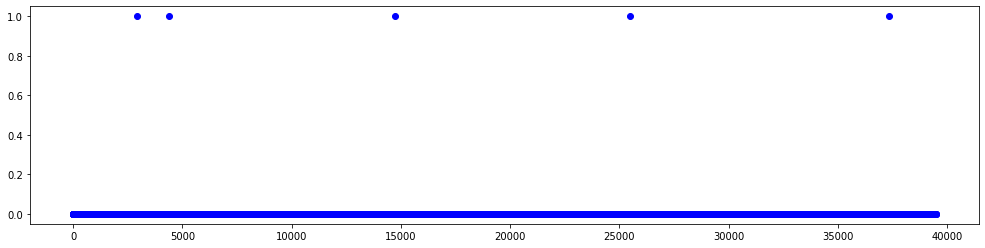

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (17, 4))
plt.plot(range(0, len(y)),y , 'bo') 

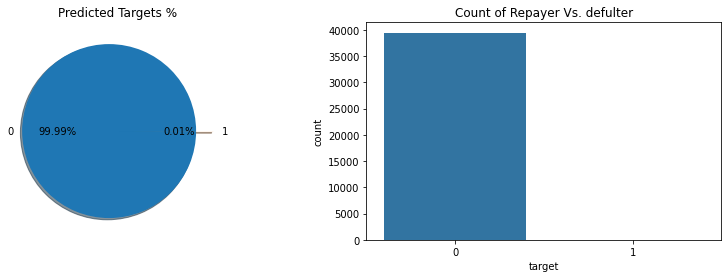

In [14]:
dataframe = (df[targ].value_counts() / len(df)).to_frame()
           
fig, ax=plt.subplots(1,2,figsize=(14,4))

df[targ].value_counts().plot.pie(explode=[0.1,0.1],autopct='%.2f%%',shadow=True,ax=ax[0])
ax[0].set_title("Predicted Targets %")
ax[0].set_ylabel('')

sns.countplot(x = targ, data = df, ax=ax[1])
ax[1].set_title('Count of Repayer Vs. defulter')

plt.show()

## Preparation().targetVar()

***Let's plot targets using : Preparation().targetVar(self, targ= "TARGET", other_df=False)***

In [15]:
prep = Preparation('train', mask)

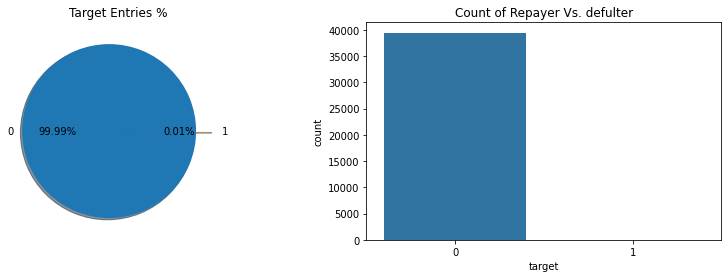

,target
0,0.999873
1,0.000127


In [16]:
y = res['Predictions']

df = pd.DataFrame(data=y, columns=["target"])


prep.targetVar(targ="target", other_df= df) # with arg : other_df, 
                                            #we can plot the repartition of predicted targets

# Model Prediction for new data 

In [17]:
## Preparing a new data from the train dataframe, and removing the target column,
#@ which we want to predict using our analysis

In [86]:
mask = ['CODE_GENDER', 'FLAG_OWN_CAR', 'OCCUPATION_TYPE',  # categ
        'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', # categ 
       'EXT_SOURCE_3', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG',  # num 
        'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'TARGET'# num
       ]
T = mask[:]
T.remove('TARGET')

In [87]:
hh = HomeCredit().get_data() # there are two sets : 'train' and 'test'

In [88]:
DF = hh['train'].loc[100:80000, T]
DF.shape

(79901, 10)

In [89]:
cc = Modeling(data_set = 'train', cols = mask, newdf = DF)

In [90]:
cc.__dict__.keys()

dict_keys(['cols', 'en', 'data', 'new_data'])

In [91]:
cc.data.head(2) # train dataset

,EXT_SOURCE_3,DAYS_EMPLOYED,FLOORSMAX_AVG,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,TARGET,F,M,N,Y,...,State servant,Student,Working,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied
0,0.139376,-637,0.0833,-9461,2,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0.500345,-1188,0.2917,-16765,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [92]:
res = cc.predict_newdata(LogisticRegression(max_iter=1000))

In [93]:
res['Predictions'].shape

(65580,)

In [94]:
res['Predictions']

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
y = res['Predictions']

df = pd.DataFrame(data=y, columns=["target"])
targ = 'target'

df[targ].value_counts()

0    65574
1        6
Name: target, dtype: int64

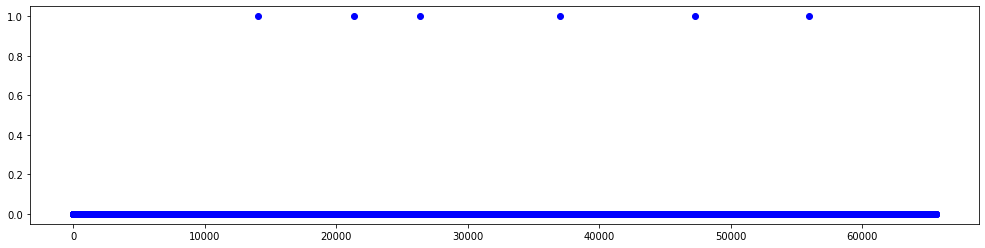

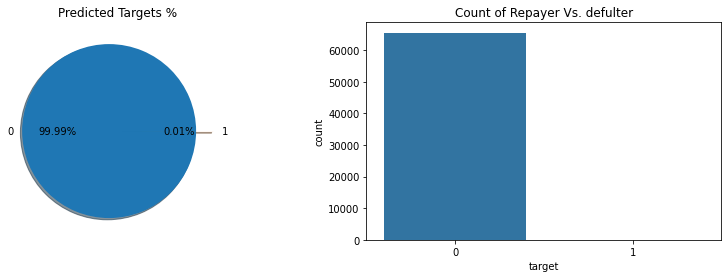

In [96]:
y = res['Predictions']

df = pd.DataFrame(data=y, columns=["target"])
targ = 'target'
df.head()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (17, 4))
plt.plot(range(0, len(y)),y , 'bo') 

dataframe = (df[targ].value_counts() / len(df)).to_frame()
           
fig, ax=plt.subplots(1,2,figsize=(14,4))

df[targ].value_counts().plot.pie(explode=[0.1,0.1],autopct='%.2f%%',shadow=True,ax=ax[0])
ax[0].set_title("Predicted Targets %")
ax[0].set_ylabel('')

sns.countplot(x = targ, data = df, ax=ax[1])
ax[1].set_title('Count of Repayer Vs. defulter')

plt.show()

In [97]:
dataframe

,target
0,0.999909
1,0.000091


# Evaluating the model -- accuracy score

In [98]:
mask = ['CODE_GENDER', 'FLAG_OWN_CAR', 'OCCUPATION_TYPE',  # categ
        'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', # categ 
       'EXT_SOURCE_3', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG',  # num 
        'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', # num
        'TARGET' # target
       ]

In [99]:
cl = Cleaning(cols = mask) # data_set = 'train', cols = None, newdf = None, targ= "TARGET"

In [100]:
cl.__dict__.keys()

dict_keys(['prep', 'cols', 'data_set', 'data', 'newdata'])

In [101]:
cl.data.shape, cl.newdata.shape  # data --> train, newdata --> test

((307511, 11), (48744, 10))

In [103]:
print("train : ", cl.data.isnull().sum().sum())

train :  311668


In [104]:
hh = HomeCredit().get_data() # there are two sets : 'train' and 'test'
E = hh['train'].loc[100:80000, mask] # with target Var

cl.data = E
print("train : ", cl.data.isnull().sum().sum()) # before, it was 311668


train :  80897


In [105]:
# Cleaning data
cl.data = cl.remove_missvalues(set_df = 'train')
print("Cleaning data : ", cl.data.shape)

print("MissValues Nbr after cleaning: ", cl.data.isnull().sum().sum()) # before, it was 311668

Cleaning data :  (65580, 11)
MissValues Nbr after cleaning:  0


## Accuracy score

In [106]:
from sklearn import metrics

In [107]:
y_pred = res['Predictions']
y_true = cl.data['TARGET']

In [108]:
print("Accuracy:",metrics.accuracy_score(y_true, y_pred))  

Accuracy: 0.9140286672766087


In [109]:
y_true.value_counts()

0    59946
1     5634
Name: TARGET, dtype: int64

In [110]:
pd.Series(y_pred).value_counts()

0    65574
1        6
dtype: int64

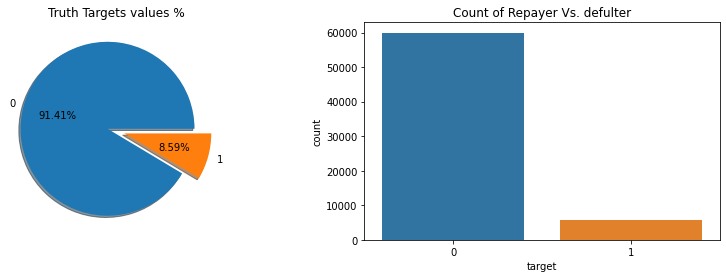

In [111]:
y_true = cl.data['TARGET']

df = pd.DataFrame(data=(y_true).to_numpy(), columns=["target"])
targ = 'target'
df.head()

import matplotlib.pyplot as plt
import seaborn as sns

dataframe = (df[targ].value_counts() / len(df)).to_frame()
           
fig, ax=plt.subplots(1,2,figsize=(14,4))

df[targ].value_counts().plot.pie(explode=[0.1,0.1],autopct='%.2f%%',shadow=True,ax=ax[0])
ax[0].set_title("Truth Targets values %")
ax[0].set_ylabel('')

sns.countplot(x = targ, data = df, ax=ax[1])
ax[1].set_title('Count of Repayer Vs. defulter')

plt.show()

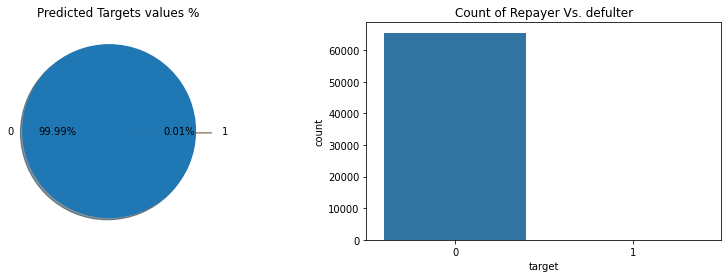

In [112]:
y_pred = res['Predictions']

df = pd.DataFrame(data=y_pred, columns=["target"])
targ = 'target'
df.head()

import matplotlib.pyplot as plt
import seaborn as sns

dataframe = (df[targ].value_counts() / len(df)).to_frame()
           
fig, ax=plt.subplots(1,2,figsize=(14,4))

df[targ].value_counts().plot.pie(explode=[0.1,0.1],autopct='%.2f%%',shadow=True,ax=ax[0])
ax[0].set_title("Predicted Targets values %")
ax[0].set_ylabel('')

sns.countplot(x = targ, data = df, ax=ax[1])
ax[1].set_title('Count of Repayer Vs. defulter')

plt.show()